In [ ]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

Dataset

In [ ]:
digits = load_digits()

In [ ]:
print("Keys in digits dataset:", digits.keys())
print("Shape of images:", digits.images.shape)
print("Shape of data (flattened):", digits.data.shape)
print("Shape of labels:", digits.target.shape)

Keys in digits dataset: dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
Shape of images: (1797, 8, 8)
Shape of data (flattened): (1797, 64)
Shape of labels: (1797,)


Image as 8x8 Grid:
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]

Flattened Feature Vector (64 pixels):
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]

Actual Label: 0


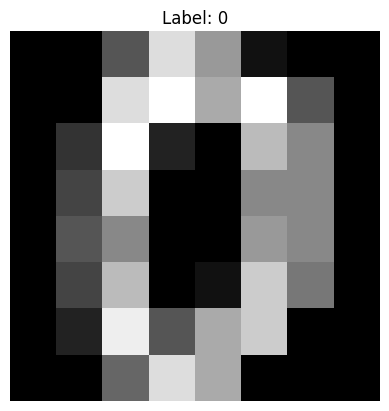

In [ ]:
import matplotlib.pyplot as plt

print("Image as 8x8 Grid:")
print(digits.images[0])

print("\nFlattened Feature Vector (64 pixels):")
print(digits.data[0])

print(f"\nActual Label: {digits.target[0]}")

plt.imshow(digits.images[0], cmap='gray')
plt.title(f"Label: {digits.target[0]}")
plt.axis('off')
plt.show()


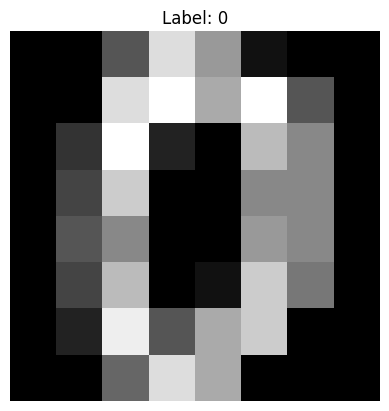

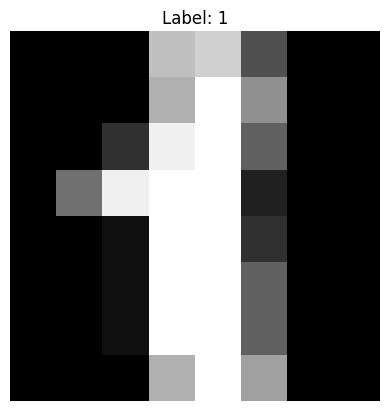

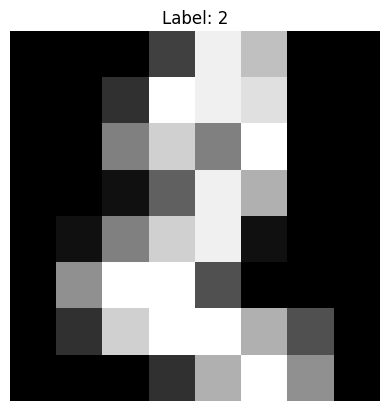

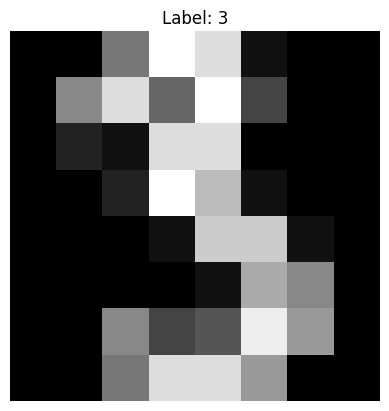

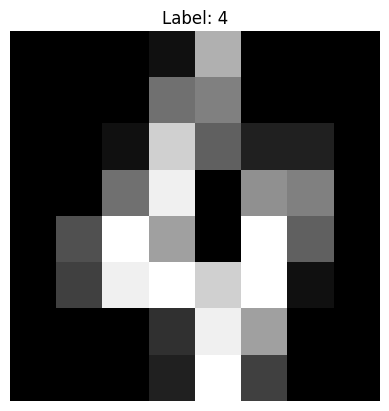

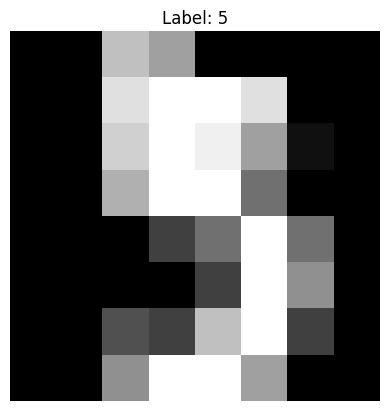

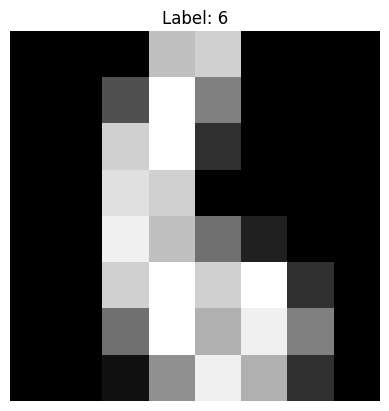

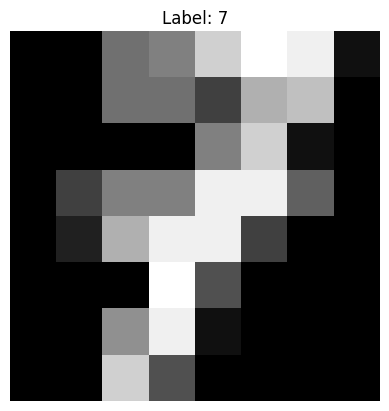

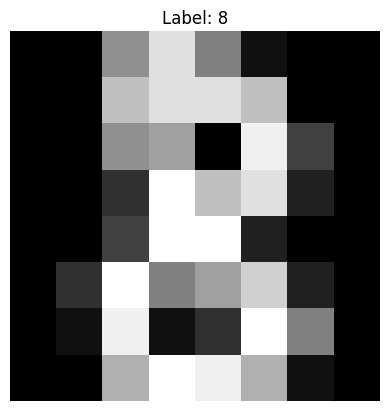

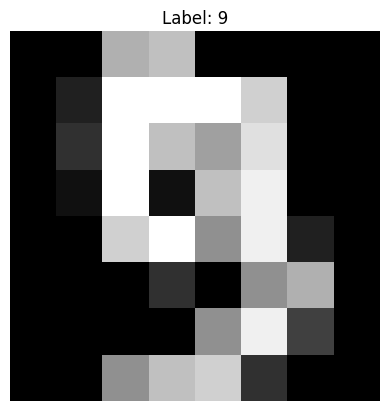

In [ ]:
for i in range(10):
    plt.figure()
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.2, random_state=42)

Model

In [ ]:
svm_model = SVC(kernel='rbf')

In [ ]:
svm_model = SVC(kernel='linear')

In [ ]:
svm_model = SVC(kernel='poly')

In [ ]:
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)


Random forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print(f"[Random Forest] Accuracy: {acc_rf:.4f}")
print("Confusion Matrix:\n", cm_rf)

[Random Forest] Accuracy: 0.9722
Confusion Matrix:
 [[32  0  0  0  1  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 45  0  0  1  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 1  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  2  0  0  0  0  0  0 28  0]
 [ 0  0  0  0  1  0  0  0  0 39]]


In [ ]:
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9917
Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0  1  0 39]]


MNIST DATASET

In [ ]:
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import StandardScaler

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
svm_model = SVC(kernel='rbf')
svm_model.fit(x_train, y_train)

SVC()

In [ ]:
y_pred_svm = svm_model.predict(x_test)

svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_cm = confusion_matrix(y_test, y_pred_svm)

print(f"SVM Accuracy: {svm_accuracy:.4f}")
print("SVM Confusion Matrix:")
print(svm_cm)

SVM Accuracy: 0.9293
SVM Confusion Matrix:
[[ 951    0    5    2    2    8    8    2    1    1]
 [   0 1119    6    2    0    1    2    1    4    0]
 [  10   13  956   11    7    4    5    6   18    2]
 [   7    1   15  941    0   16    1    6   19    4]
 [   3    2   18    1  929    0    3    5    4   17]
 [   7    6    7   41    6  789   12    2   19    3]
 [  12    3   13    1    8   17  902    0    2    0]
 [   2    8   23   13   10    1    0  945    5   21]
 [  12    6   11   28    8   24    9    6  858   12]
 [   6    7    6   10   36    4    1   23   13  903]]


Random Forest

In [ ]:
rf_model.fit(x_train, y_train)

y_pred_rf = rf_model.predict(x_test)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_cm = confusion_matrix(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print("Random Forest Confusion Matrix:")
print(rf_cm)


Random Forest Accuracy: 0.9669
Random Forest Confusion Matrix:
[[ 971    0    1    0    0    2    2    1    3    0]
 [   0 1126    2    2    1    1    1    0    1    1]
 [   7    1  993    9    4    1    3    8    6    0]
 [   1    0   13  967    0    8    0    9    9    3]
 [   1    0    0    0  951    0    7    0    5   18]
 [   4    1    2   10    2  862    3    2    5    1]
 [   6    3    1    0    2    5  937    0    4    0]
 [   2    3   23    4    0    0    0  982    3   11]
 [   7    0    5   11    6    5    7    2  922    9]
 [   7    6    1   14   11    1    1    6    4  958]]
